In [160]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import funcTest as ft
import importlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import MaxAbsScaler

%matplotlib inline

In [161]:
path = 'F:\\TFG\\datasets\\data_train\\'

statsDB_3part = pd.read_csv(path + 'Nature_wStatsDB_v1.csv')
statsDB3 = pd.read_csv(path + 'statsDB3.csv')

## VISUALIZACIÓN DATASET CON TENDENCIAS DE 3 PARTIDOS

In [162]:
data = ft.normalDB(statsDB3,scaler=MaxAbsScaler())
data

,HS,AS,HST,AST,HC,AC,HF,AF,B365H,B365D,...,tend_HC,tend_AC,tend_HF,tend_AF,dif_puntos,dif_goles,dif_shots,dif_targets,dif_corners,res
0,0.378378,0.500000,0.266667,0.428571,0.555556,0.2500,0.413793,0.448276,0.114286,0.205882,...,0.375,0.162162,0.492537,0.522388,0.000000,-0.384615,-0.468085,-0.535714,-0.321429,1
1,0.432432,0.500000,0.200000,0.428571,0.277778,0.5625,0.482759,0.275862,0.190476,0.223529,...,0.500,0.432432,0.761194,0.537313,-0.222222,-0.153846,-0.063830,-0.035714,-0.142857,1
2,0.162162,0.400000,0.266667,0.285714,0.277778,0.6875,0.586207,0.482759,0.147619,0.211765,...,0.300,0.486486,0.597015,0.402985,-0.111111,0.000000,0.106383,0.214286,0.214286,-1
3,0.216216,0.400000,0.333333,0.071429,0.111111,0.2500,0.448276,0.310345,0.072857,0.264706,...,0.225,0.297297,0.582090,0.641791,0.111111,0.076923,-0.042553,-0.071429,0.071429,-1
4,0.540541,0.266667,0.333333,0.357143,0.555556,0.1250,0.310345,0.379310,0.072857,0.254706,...,0.300,0.270270,0.626866,0.477612,-0.222222,-0.076923,-0.148936,-0.071429,-0.071429,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,0.459459,0.300000,0.266667,0.285714,0.444444,0.2500,0.310345,0.517241,0.058095,0.352941,...,0.350,0.270270,0.522388,0.537313,-0.333333,-0.076923,-0.170213,0.071429,-0.142857,-1
1674,0.459459,0.366667,0.466667,0.214286,0.333333,0.2500,0.448276,0.655172,0.087143,0.211765,...,0.225,0.567568,0.492537,0.402985,0.333333,-0.076923,0.021277,0.000000,0.428571,-1
1675,0.351351,0.233333,0.266667,0.357143,0.166667,0.2500,0.517241,0.482759,0.523810,0.382353,...,0.200,0.756757,1.000000,0.388060,-0.111111,-0.076923,0.553191,0.285714,0.714286,1
1676,0.243243,0.433333,0.133333,0.357143,0.055556,0.1875,0.724138,0.379310,0.154762,0.191176,...,0.475,0.135135,0.567164,0.701493,0.444444,0.615385,0.063830,0.321429,-0.500000,0


In [264]:
nData = statsDB3.sample(axis=0,n=250,random_state=1)

In [265]:
nData.columns

Index(['HS', 'AS', 'HST', 'AST', 'HC', 'AC', 'HF', 'AF', 'B365H', 'B365D',
       'B365A', 'tend_ptsH', 'tend_ptsA', 'tend_goalsH', 'tend_goalsA',
       'tend_HS', 'tend_AS', 'tend_HST', 'tend_AST', 'tend_HC', 'tend_AC',
       'tend_HF', 'tend_AF', 'res', 'dif_puntos', 'dif_goles', 'dif_shots',
       'dif_targets', 'dif_corners'],
      dtype='object')

In [266]:
min(nData['dif_shots']),max(nData['dif_shots'])

(-37.0, 42.0)

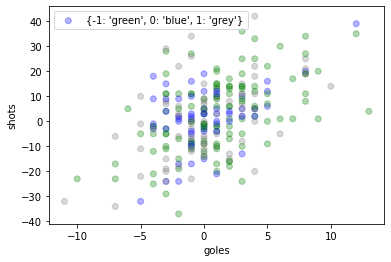

In [267]:
fig, ax = plt.subplots()
x = nData['dif_goles']
y = nData['dif_shots']
colors = {-1:'green',0:'blue',1:'grey'}
ax.scatter(x,y,alpha=0.3,c=nData['res'].map(colors), label = colors)
ax.set_xlabel('goles')
ax.set_ylabel('shots')
ax.legend()

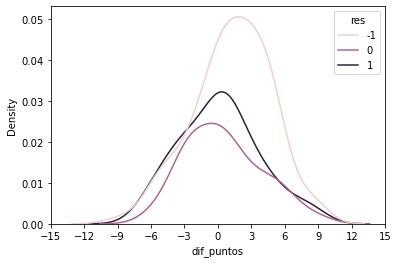

In [268]:
sns.kdeplot(
    data = nData, x = 'dif_puntos',
    hue = 'res',
    alpha = 0.5, color = 'blue'
    
)
g = plt.xticks(range(-15,16,3))

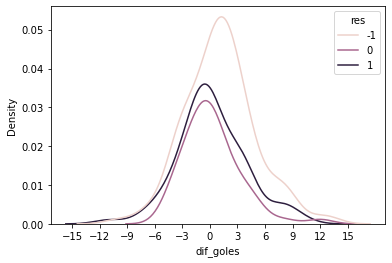

In [269]:
sns.kdeplot(
    data = nData, x = 'dif_goles',
    hue = 'res',
    alpha = 0.5, color = 'red'
)
g = plt.xticks(range(-15,16,3))

<AxesSubplot:xlabel='tend_HF', ylabel='tend_goalsH'>

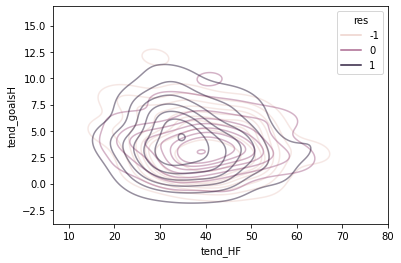

In [270]:
sns.kdeplot(
    data = nData, x = 'tend_HF',y = 'tend_goalsH',
    hue='res',alpha=0.5
)

<AxesSubplot:xlabel='tend_HF', ylabel='Count'>

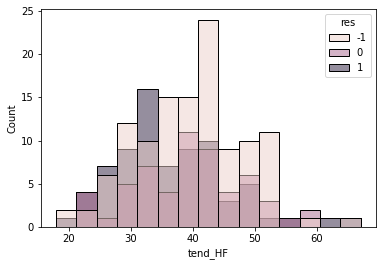

In [271]:
sns.histplot(
    data = nData, x='tend_HF',
    hue='res',alpha=0.5
)

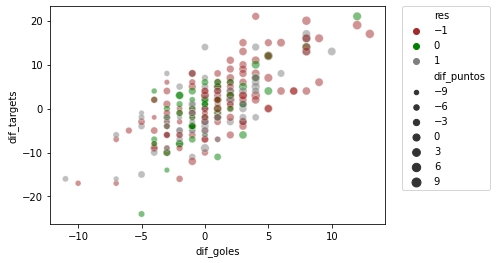

In [272]:
color_dict = {-1:'brown',0:'green',1:'grey'}

sns.scatterplot(
    data=nData, x="dif_goles", y="dif_targets", hue="res", size="dif_puntos",
    sizes=(20, 80), hue_norm=(0, 7), legend="brief",
    palette=color_dict, alpha=0.5
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
